# Titanic Survival Prediction - Data Science Learning Assignment
**By Swagat Sarangi**



### Objectives:
1. Develop a machine learning model to predict whether a passenger survived the Titanic disaster.
2. Dataset includes features like age, gender, ticket class, fare, cabin information etc
3. Handle missing values, encode categorical variables, and normalize numerical data effectively.
4. Evaluate model performance using accuracy, precision, etc.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
df = pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis (EDA)



In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


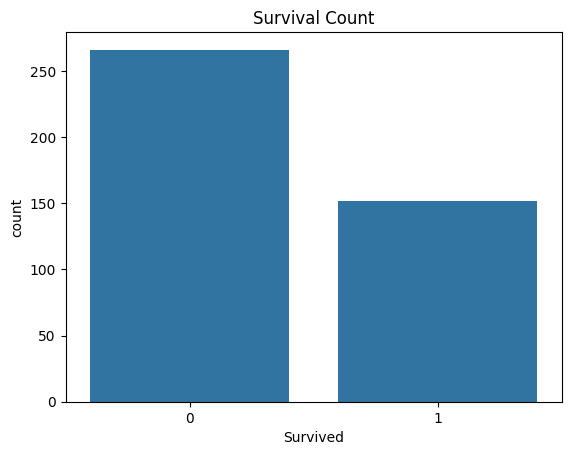

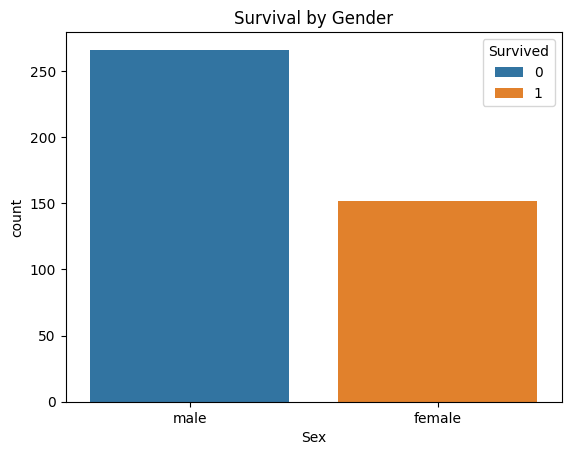

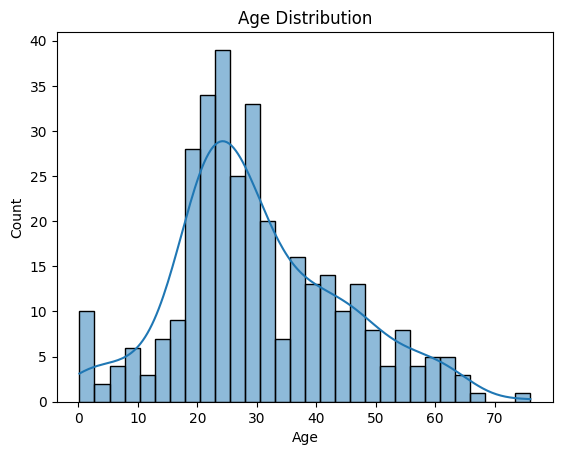

In [6]:
# Survival count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

##CORRELATION MAP

The main purpose of this is to if there any possible relation in between the features like age , survived etc


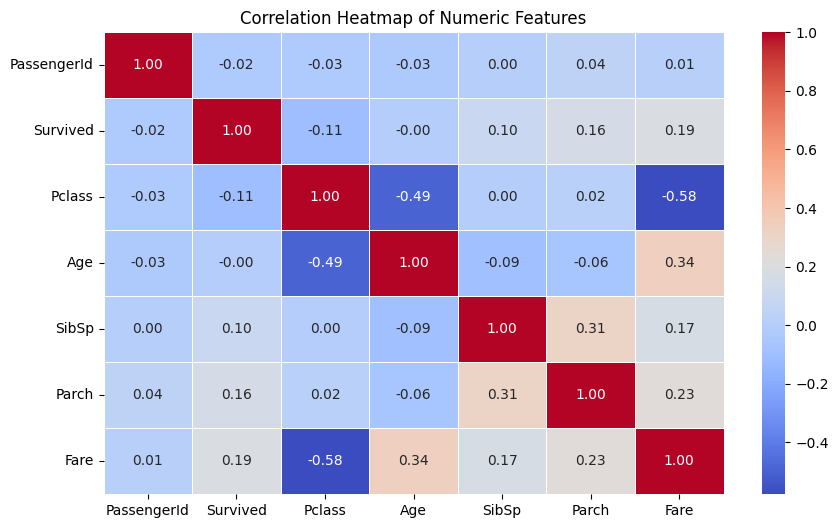

In [7]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Data Preprocessing

Steps:
- Dropped columns not useful for prediction: `PassengerId`, `Name`, `Ticket`, `Cabin`
- Filled missing values in `Age` and `Fare` with median
- Label encoded categorical features: `Sex`, `Embarked`
- Normalized numerical columns: `Age`, `Fare`

In [8]:
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df_cleaned['Fare'].fillna(df_cleaned['Fare'].median(), inplace=True)

# Encode categorical features
df_cleaned['Sex'] = LabelEncoder().fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = LabelEncoder().fit_transform(df_cleaned['Embarked'])

# Normalize numerical columns
scaler = StandardScaler()
df_cleaned[['Age', 'Fare']] = scaler.fit_transform(df_cleaned[['Age', 'Fare']])

df_cleaned.head()

<ipython-input-8-5b581e548567>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
<ipython-input-8-5b581e548567>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.386231,0,0,-0.497413,1
1,1,3,0,1.371370,1,0,-0.512278,2
2,0,2,1,2.553537,0,0,-0.464100,1
3,0,3,1,-0.204852,0,0,-0.482475,2
4,1,3,0,-0.598908,1,1,-0.417492,2


## Model Training and Evaluation

I used Random forest classifier because this model is more accurate due to ensemble learning.Other models like decision tree classifier can also be used.

In [9]:
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



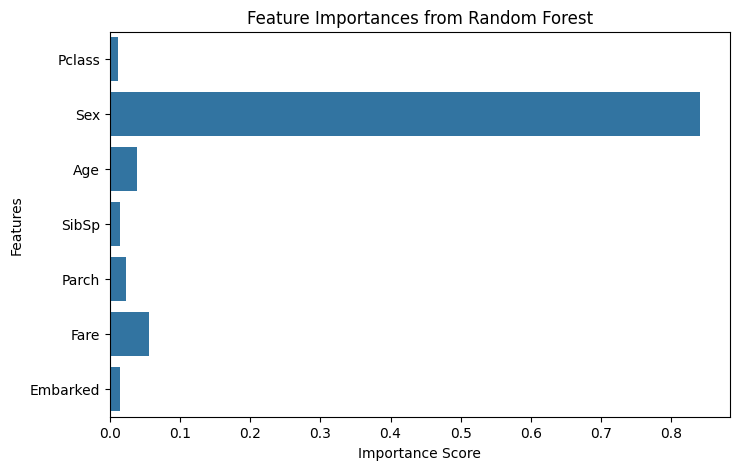

In [11]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Conclusion

- Developed a complete ML pipeline to predict Titanic survival.
- Handled missing values, encoded categorical data, normalized features.
- Achieved excellent evaluation metrics using Random Forest.
- Presented data insights through EDA and feature importance visualizations.

---

**Prepared by: Swagat Sarangi**  
